## Notes on Scaling

## Scaling: important step in pre-processing for data that is dimensionally very different, and is being fed into an algorithm that depends on distance
- KNN
- Deep Learning

In [1]:
# experimentally test out your ideas when it comes to scaling
# Jason Brownlee, PHD, grand poobah of DS

### use it on data with serious differences in proportion for distance based algorithms

### discussion of scaling:
- ex: compare A and B to C and D:
        - who is more similar?
- in scaled data, the proportion is what is important
- Euclidean distance v. geometric v. Manhattan (block by block)
    - sq rt (sum of distances sqred)
- Scale the data for distance based classifiers/algorithms/DL models
- Types of Scaling
    - min/max scaling (0-1):
        - score the values on a linear scale:
            - 2 ft: assigned value of 0
            - 3 ft: 0.6
            - 6 ft: 1
    - standard scaling
    - robust scaling

In [2]:
# try all 3 scaling methods when modeling

In [3]:
# scaler = MinMaxScaler()
# scaling_example[['x1_minmax', 'x2_minmax']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

# scaler = StandardScaler()
# scaling_example[['x1_standard', 'x2_standard']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

# scaler = RobustScaler()
# scaling_example[['x1_robust', 'x2_robust']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

In [4]:
# scaling_example[sorted(scaling_example)] # sort columns alphabetically

In [5]:
## scale after splitting the data into train, validate, test

## Exercises

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [6]:
## .inverse_transform

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
import wrangle
import split

In [9]:
df = wrangle.wrangle_zillow()
df.head()

(2134889, 8)
(2096764, 8)


,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,11324547,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,11544747,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,11585547,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
18,12716947,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037
19,12757147,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037


In [10]:
# split data set before applying scaling. Fit only on train.

In [11]:
train, validate, test = split.train_validate_test_split(df, 'taxvaluedollarcnt')
train.shape, validate.shape, test.shape

((1174187, 8), (503224, 8), (419353, 8))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174187 entries, 1913513 to 1641649
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   parcelid                      1174187 non-null  object 
 1   bedroomcnt                    1174187 non-null  float64
 2   bathroomcnt                   1174187 non-null  float64
 3   calculatedfinishedsquarefeet  1174187 non-null  float64
 4   taxvaluedollarcnt             1174187 non-null  float64
 5   yearbuilt                     1174187 non-null  float64
 6   taxamount                     1174187 non-null  float64
 7   fips                          1174187 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 80.6+ MB


In [13]:
#make a list of columns to scale, add to a list
# train_scaled = train.copy()
# train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
# look at documentation for zip

def fit_and_scale(scaler, train, validate, test):
    # only scales float columns
    floats = train.select_dtypes(include='float64').columns
    # fits scaler to training data only, then transforms
    # train, validate & test
    scaler.fit(train[floats])
    scaled_train = pd.DataFrame(data=scaler.transform(train[floats]), columns=floats)
    scaled_validate = pd.DataFrame(data=scaler.transform(validate[floats]), columns=floats)
    scaled_test = pd.DataFrame(data=scaler.transform(test[floats]), columns=floats)
    return scaled_train, scaled_validate, scaled_test

In [ ]:
# don't scale the target

## Min-Max Scaling

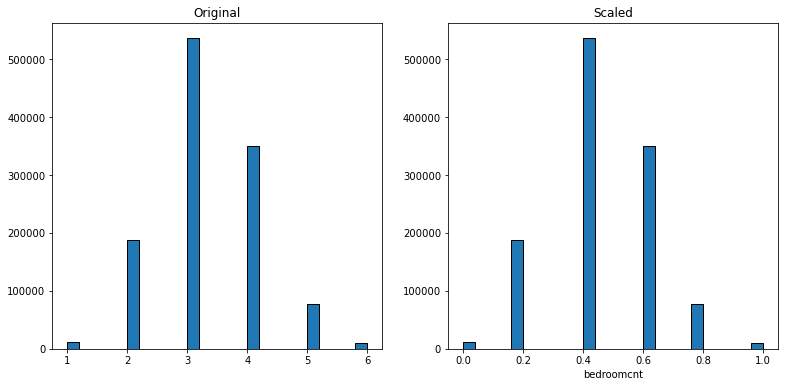

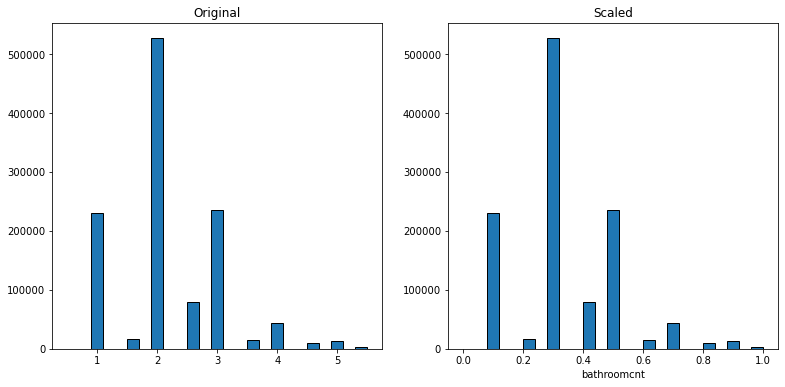

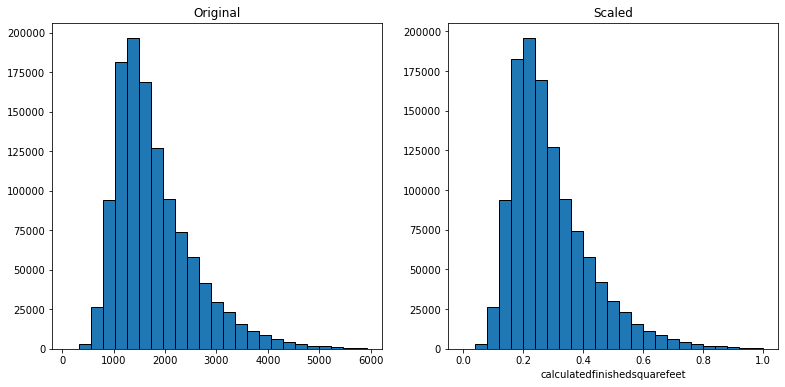

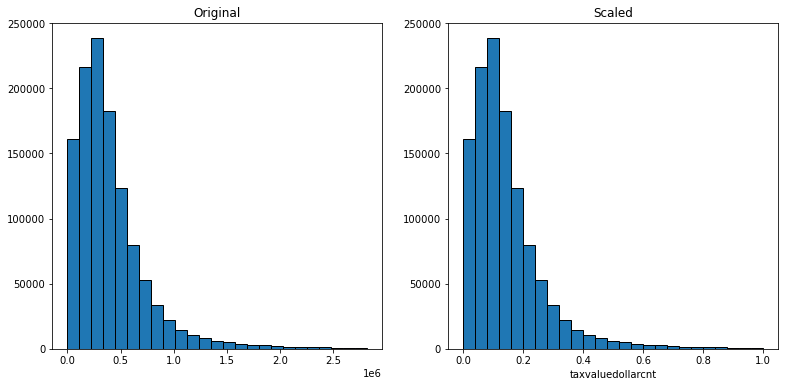

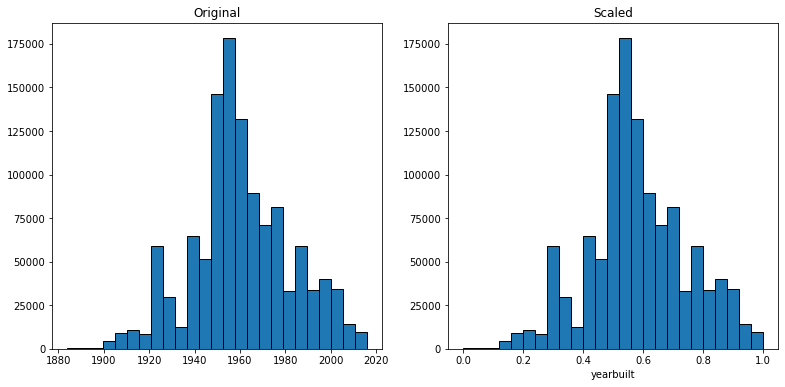

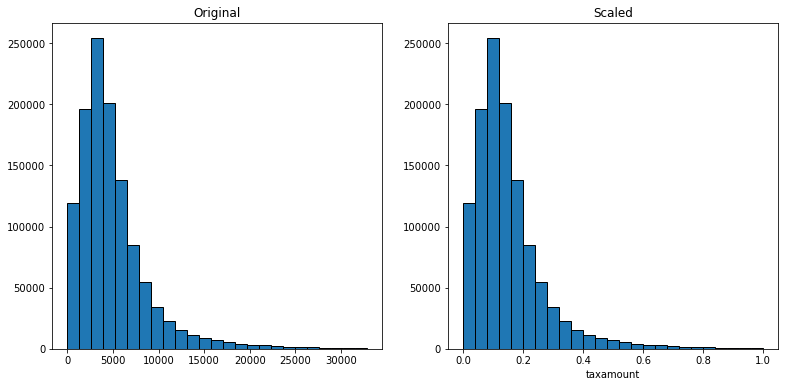

In [14]:
# transforms the scale to 0-1 scale, from original:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
scaler.fit(train)

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
min_max_train, min_max_validate, min_max_test = fit_and_scale(scaler, train, validate, test)

quants = min_max_train.columns
train_quants = train[quants]
#print(train_quants)

for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(min_max_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

In [15]:
min_max_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,0.8,0.5,0.397599,0.199268,0.674242,0.202873
1,0.2,0.3,0.166038,0.130268,0.500000,0.130387
2,0.2,0.1,0.117667,0.058781,0.492424,0.072412
3,0.4,0.3,0.234648,0.139973,0.500000,0.150040
4,0.2,0.1,0.191424,0.246771,0.310606,0.257469


## Standard Scaling

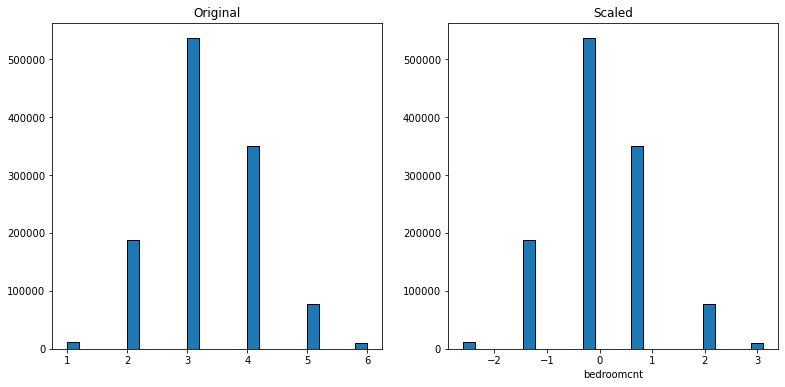

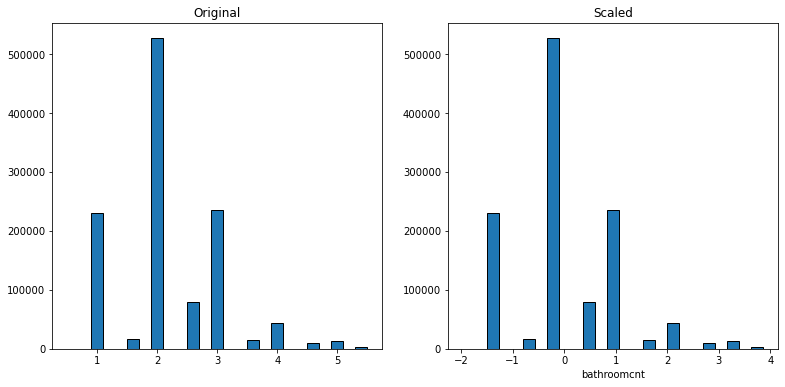

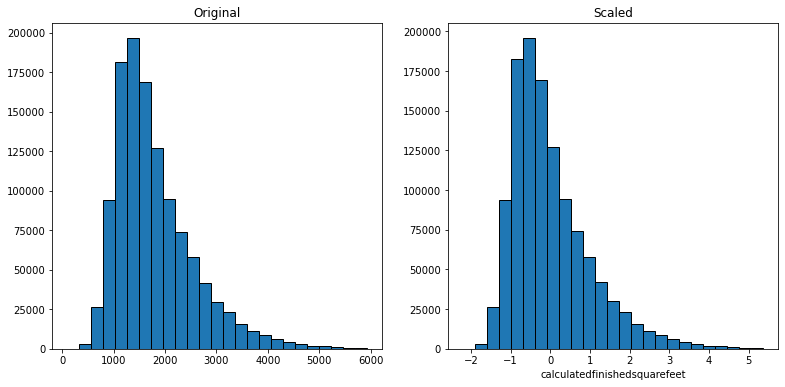

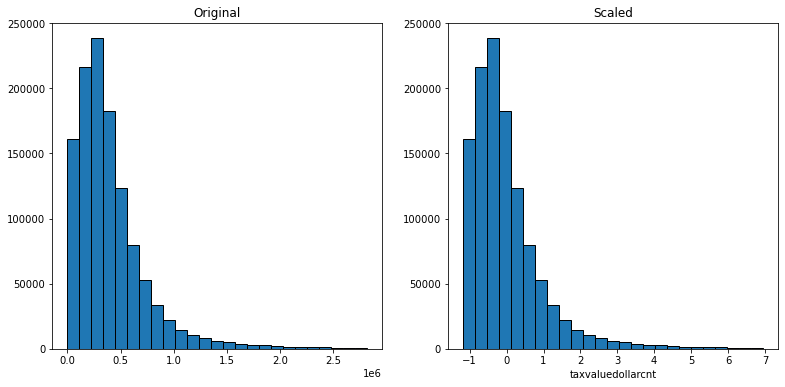

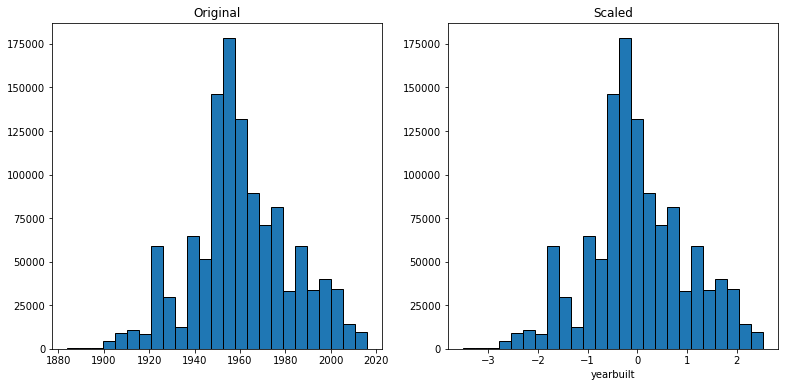

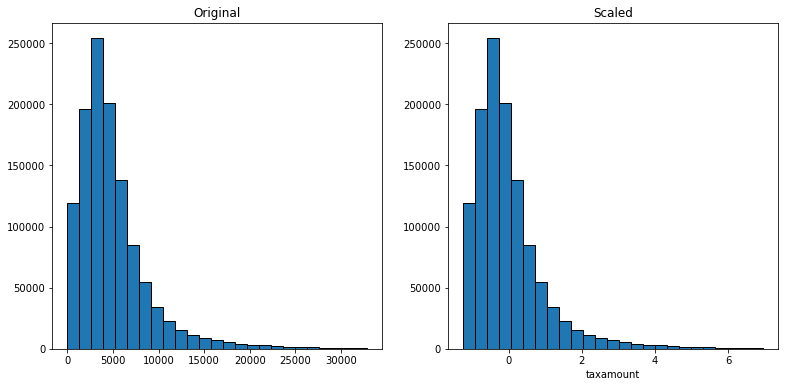

In [16]:
# standard scaling transforms the scale to meet a normal standard dist,
# with a mean of 0, and std of 1
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
scaler.fit(train)

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
standard_train, standard_validate, standard_test = fit_and_scale(scaler, train, validate, test)

quants = standard_train.columns
train_quants = train[quants]
#print(train_quants)

for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(standard_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

## Robust Scaler

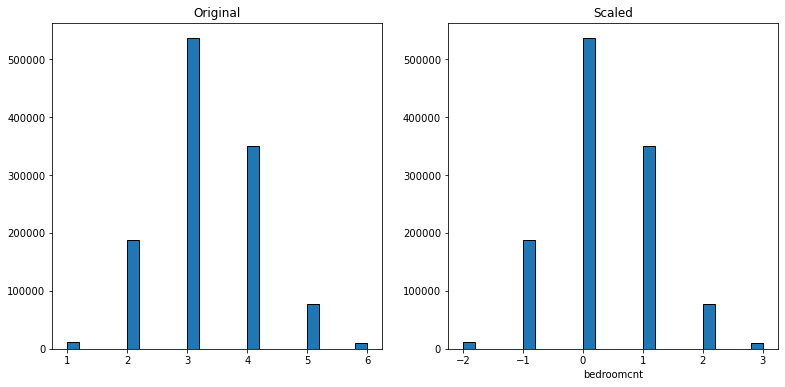

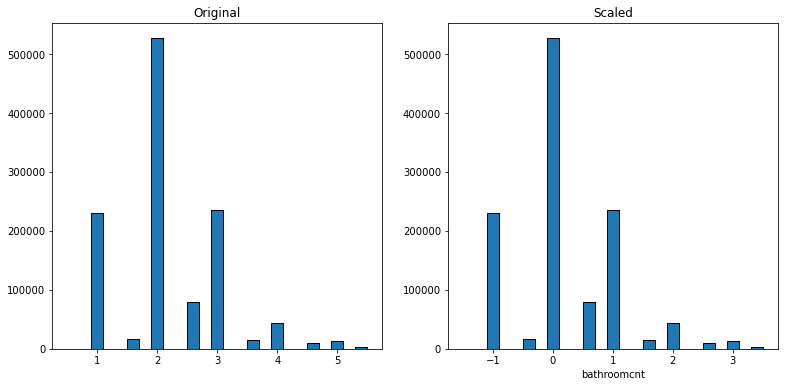

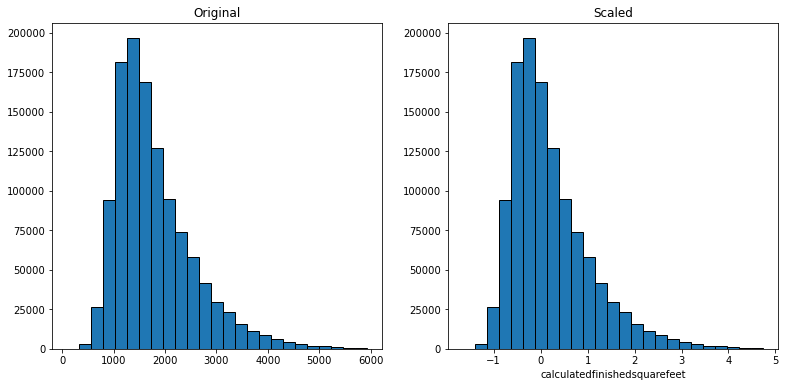

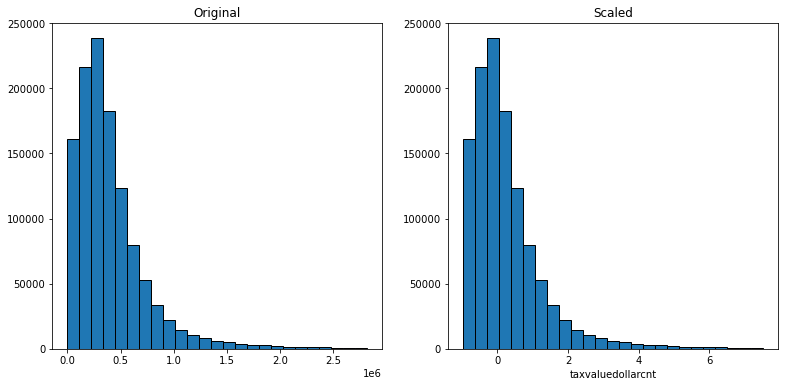

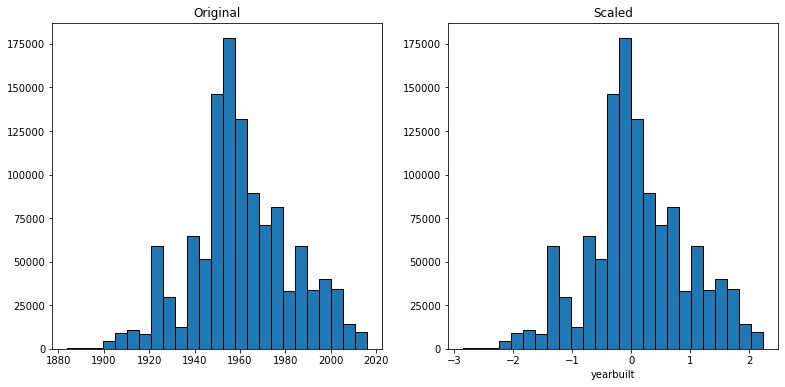

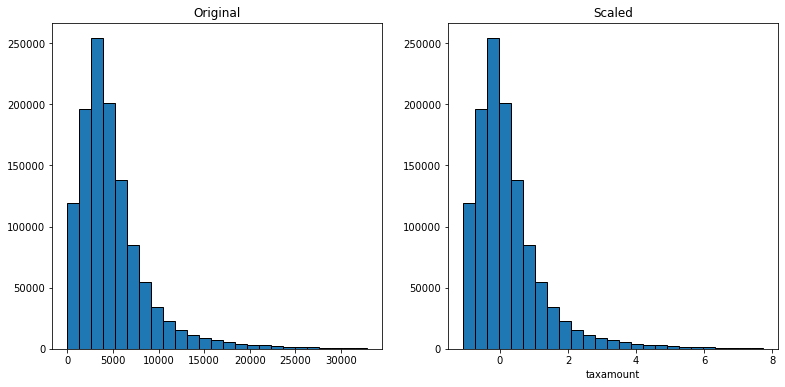

In [26]:
# linear transformation, using more robust parameters (IQR)
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.

scaler.fit(train)

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
# we are creating a scaled dataset in addition to our unscaled original
robust_train, robust_validate, robust_test = fit_and_scale(scaler, train, validate, test)

quants = robust_train.columns
train_quants = train[quants]
#print(train_quants)

for col in train_quants.columns:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(train[col], bins=25, ec='black')
    plt.title('Original')
    plt.subplot(122)
    plt.hist(robust_train[col], bins=25, ec='black')
    plt.title('Scaled')
    plt.xlabel(col)

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [18]:
#standard scaler
data = standard_train
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train[quants])
x_df = pd.DataFrame(scaler.inverse_transform(standard_train), columns=quants)
x_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,5.0,3.0,2420.0,562318.0,1973.0,6680.10
1,2.0,2.0,1070.0,367613.0,1950.0,4299.22
2,2.0,1.0,788.0,165892.0,1949.0,2394.95
3,3.0,2.0,1470.0,395000.0,1950.0,4944.74
4,2.0,1.0,1218.0,696364.0,1925.0,8473.37


In [19]:
train[quants].reset_index().drop(columns='index') == x_df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1174182,True,True,True,True,True,True
1174183,True,True,True,True,True,True
1174184,True,True,True,True,True,True
1174185,True,True,True,True,True,True


In [20]:
pd.DataFrame(train[quants].reset_index().drop(columns='index') == x_df).mean()

bedroomcnt                      1.000000
bathroomcnt                     1.000000
calculatedfinishedsquarefeet    0.968285
taxvaluedollarcnt               0.948432
yearbuilt                       1.000000
taxamount                       0.876673
dtype: float64

In [21]:
#min_max scaler
data = min_max_train
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train[quants])
x2_df = pd.DataFrame(scaler.inverse_transform(min_max_train), columns=quants)

In [22]:
train[quants].reset_index().drop(columns='index').round(1) == x2_df.round(1)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1174182,True,True,True,True,True,True
1174183,True,True,True,True,True,True
1174184,True,True,True,True,True,True
1174185,True,True,True,True,True,True


In [23]:
train[quants].reset_index().drop(columns='index').head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,5.0,3.0,2420.0,562318.0,1973.0,6680.10
1,2.0,2.0,1070.0,367613.0,1950.0,4299.22
2,2.0,1.0,788.0,165892.0,1949.0,2394.95
3,3.0,2.0,1470.0,395000.0,1950.0,4944.74
4,2.0,1.0,1218.0,696364.0,1925.0,8473.37


In [24]:
x2_df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,5.0,3.0,2420.0,562318.0,1973.0,6680.10
1,2.0,2.0,1070.0,367613.0,1950.0,4299.22
2,2.0,1.0,788.0,165892.0,1949.0,2394.95
3,3.0,2.0,1470.0,395000.0,1950.0,4944.74
4,2.0,1.0,1218.0,696364.0,1925.0,8473.37


In [25]:
(train[quants].reset_index().drop(columns='index').round(1) == x2_df.round(1)).mean()

bedroomcnt                      1.000000
bathroomcnt                     0.999998
calculatedfinishedsquarefeet    1.000000
taxvaluedollarcnt               1.000000
yearbuilt                       1.000000
taxamount                       0.999931
dtype: float64

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [ ]:
# quantile transform applied:
visualize_scaler(scaler=QuantileTransformer)

In [ ]:
# ordinary least squares regression
# gradient ascending approach